# `1. Background`

Housing prices have always been a crucial indicator of economic stability and market trends. Various factors, including economic conditions, demographic shifts, and urban development, influence real estate values. Accurate price predictions are essential for homebuyers, sellers, and real estate investors, helping them make informed decisions. Machine learning has emerged as a powerful tool in this domain, offering more precise and data-driven insights compared to traditional valuation methods.

# `2. Problem Statement`

Predicting house prices accurately remains a significant challenge due to the complex interplay of various influencing factors. Conventional methods often fail to capture non-linear relationships and hidden patterns in housing data. The objective is to leverage machine learning techniques to develop a predictive model that enhances accuracy and provides valuable insights for market participants.

# `3. Goals`

The Goals of this Analysis is:

* Develop a robust machine learning model to improve the accuracy of house price predictions.
* Optimize model performance through feature engineering and hyperparameter tuning to enhance predictive capabilities.
* Compare machine learning predictions with a rule-based approach to assess improvements and reliability.
* Provide actionable insights for key stakeholders (Homebuyers & Sellers, Real Estate Investors,  & Policymakers)

# `4. Data Understanding`

### Importing Modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

# Suppress warnings and display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# ======== Data Splitting & Validation ========
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, 
    GridSearchCV, RandomizedSearchCV
)
import statsmodels.api as sm

# ======== Data Preprocessing ========
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, RobustScaler, 
    KBinsDiscretizer, PolynomialFeatures, OneHotEncoder, 
    OrdinalEncoder, LabelEncoder, FunctionTransformer
)
import category_encoders as ce  # For categorical encoding
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # For imbalanced datasets

# ======== Feature Engineering ========
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, f_regression, f_classif, 
    SelectFromModel, RFE, SequentialFeatureSelector
)
from sklearn.cluster import KMeans  # Clustering for location-based features
from sklearn.base import BaseEstimator, TransformerMixin  # Custom transformers
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ======== Models ========
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, SGDRegressor, 
    PassiveAggressiveClassifier, RidgeClassifier
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingClassifier, 
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, 
    HistGradientBoostingClassifier, VotingClassifier, StackingClassifier
)
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR  # Support Vector Regression

# ======== Boosting Models ========
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# ======== Model Evaluation ========
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
    accuracy_score, recall_score, precision_score, f1_score, 
    roc_auc_score, classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)

### Load Dataset

In [8]:
df = pd.read_csv('data_california_house.csv')
display(df.info(),df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


None

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14445    -121.90     36.58                31.0       1431.0             NaN   
14446    -117.93     33.62                34.0       2125.0           498.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0         1.9750          INLAND   
1           836.0       277.0         2.2604        NEAR BAY   
2          1387.0       364.0         6.2990       <1H OCEAN   
3          3051.0      1000.0         1.7199       <1H OCEAN   
4           606.0       167.0         2.2206          INLAND   
...           ...         ...            ...             ...   
14443       712.0       219.0         4.4125          INLAND   
14444       647.0       209.0         2.9135          INLAND   
14445       704.0       393.0         3.1977      NEAR OCEAN   
14446      1052.0       468.0         5.6315       <1H OCEAN   
14447      1024.0       298.0         1.3882          INLAND   

       median_house_value  
0                 47500.0  
1                100000.0  
2                285800.0  
3                175000.0  
4                 59200.0  
...                   ...  
14443            144600.0  
14444            159400.0  
14445            289300.0  
14446            484600.0  
14447             69400.0  

[14448 rows x 10 columns]

### `4.1 Feature Explanation`

To further understand the meaning of each features, it will be categorized for better understanding.

### 1. House Details
* `housing_median_age`: The median age of the houses in the block group (age of construction).
* `total_rooms`: The total number of rooms across all houses in the block group.
* `total_bedrooms`: The total number of bedrooms across all houses in the block group.
* `households`: The number of households in the block group (a household is a group of people living in a single housing unit).
* `median_house_value`: The median house price in the block group (target variable for prediction).

### 2. Location & Geography
* `longitude` and `latitude`: Geographical coordinates specifying the location of the block group.
* `ocean_proximity`: A categorical variable describing how close the block group is to the ocean (e.g., INLAND, <1H OCEAN, NEAR BAY).

### 3. Residents Demography
* `population`: The total number of people living in the block group.
* `median_income`: The median household income of residents in the block group (in units of $10,000).

### `4.2 Data Exploration`

### Checking Unique Value for Each Feature

In [12]:
listItem = []
for x in df.columns :
    listItem.append([x, df[x].nunique(), df[x].unique()])

Desc_Table = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
Desc_Table

Column Name  Number of Unique  \
0           longitude               806   
1            latitude               836   
2  housing_median_age                52   
3         total_rooms              5227   
4      total_bedrooms              1748   
5          population              3498   
6          households              1649   
7       median_income              9797   
8     ocean_proximity                 5   
9  median_house_value              3548   

                                       Unique Sample  
0  [-119.79, -122.21, -118.04, -118.28, -119.81, ...  
1  [36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6...  
2  [52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0...  
3  [112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0...  
4  [28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14...  
5  [193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ...  
6  [40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14...  
7  [1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8...  
8  [INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]  
9  [47500.0, 100000.0, 285800.0, 175000.0, 59200....

### Checking for Missing Value in the Dataset

In [14]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

### Checking for Duplicates Present in the Dataset

In [16]:
df.duplicated().sum()

0

### Checking for Zero Value (0) in the Dataset

In [18]:
# Count the number of zero values in each column
zero_counts = (df == 0).sum()

# Display columns with zero values
zero_counts[zero_counts > 0].sum()

0

### Insights:

### Feature Diversity & Variability

* Latitude & Longitude show high uniqueness, confirming a broad geographical coverage.
* Total rooms, total bedrooms, and population have thousands of unique values, indicating significant variation in house sizes.
* Median income's high granularity suggests it is a strong differentiator of house prices.

### Data Quality Check

* 137 missing values in total_bedrooms.
* No duplicates & zero values are present in the dataset.

# `5. Explanatory Data Analysis`

### `5.1 Descriptive Analysis`

In [22]:
display(df.describe(),df.describe(include=object))

longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.570600   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        647.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14448.000000  
mean        206824.624516  
std         115365.476182  
min          14999.000000  
25%         119600.000000  
50%         180000.000000  
75%         263900.000000  
max         500001.000000

ocean_proximity
count            14448
unique               5
top          <1H OCEAN
freq              6369

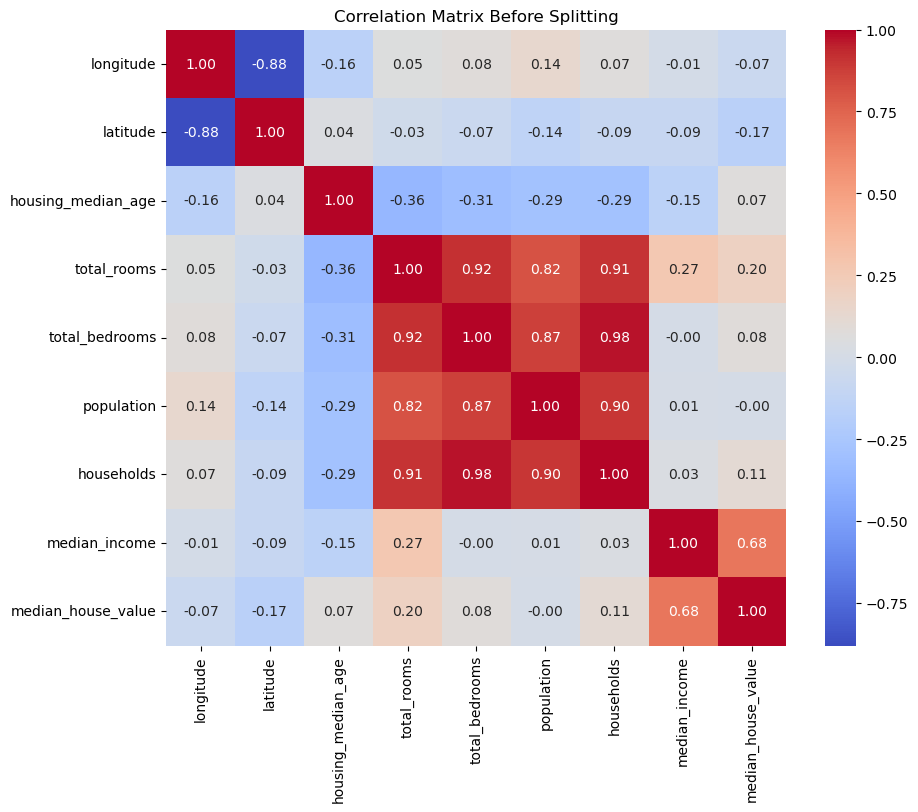

In [23]:
# Heatmap before splitting
def plot_heatmap(df, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title)
    plt.show()

plot_heatmap(df, "Correlation Matrix Before Splitting")

In [24]:
# Function to compute VIF
def calculate_vif(df):
    df = df.dropna()
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_data = vif_data.sort_values(by="VIF", ascending=False)  # Sort from highest to lowest
    print(vif_data)

# VIF before feature engineering
print("VIF Before Feature Engineering:")
calculate_vif(df.select_dtypes(include=[np.number]))

VIF Before Feature Engineering:
              Feature         VIF
0           longitude  625.512072
1            latitude  562.738077
4      total_bedrooms   90.317997
6          households   87.073590
3         total_rooms   31.306657
5          population   16.457676
7       median_income   15.377232
8  median_house_value   10.067325
2  housing_median_age    7.854526


### Insight:

* `median_income` is the strongest predictor of house prices.
* Geographic features (`longitude`, `latitude`) alone do not strongly determine prices but may interact with other factors.
* High multicollinearity exists among household-related features, requiring dimensionality reduction techniques (feature engineering or dropping redundant variables)

### `5.2 Housing Details`

### House Age vs Price

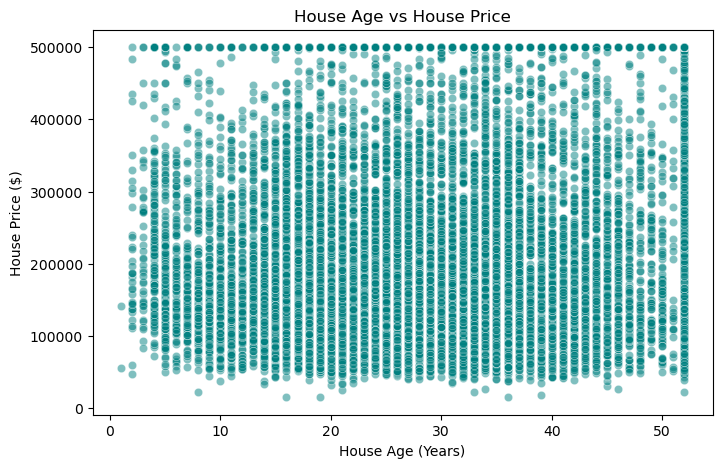

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["housing_median_age"], y=df["median_house_value"], color="teal", alpha=0.5)
plt.title("House Age vs House Price")
plt.xlabel("House Age (Years)")
plt.ylabel("House Price ($)")
plt.show()

### Insight:

* No strong correlation between house age and price—prices are widely spread across all ages.
* Ceiling effect at $500K suggests capped property values, likely due to regulatory limits or data constraints.
* Slightly higher density of high-value homes in younger properties (age < 20), indicating newer houses might be more desirable or renovated.
* Older houses still maintain competitive prices, likely due to location advantages or property upgrades.

### Rooms, Bedrooms, Households vs. Price

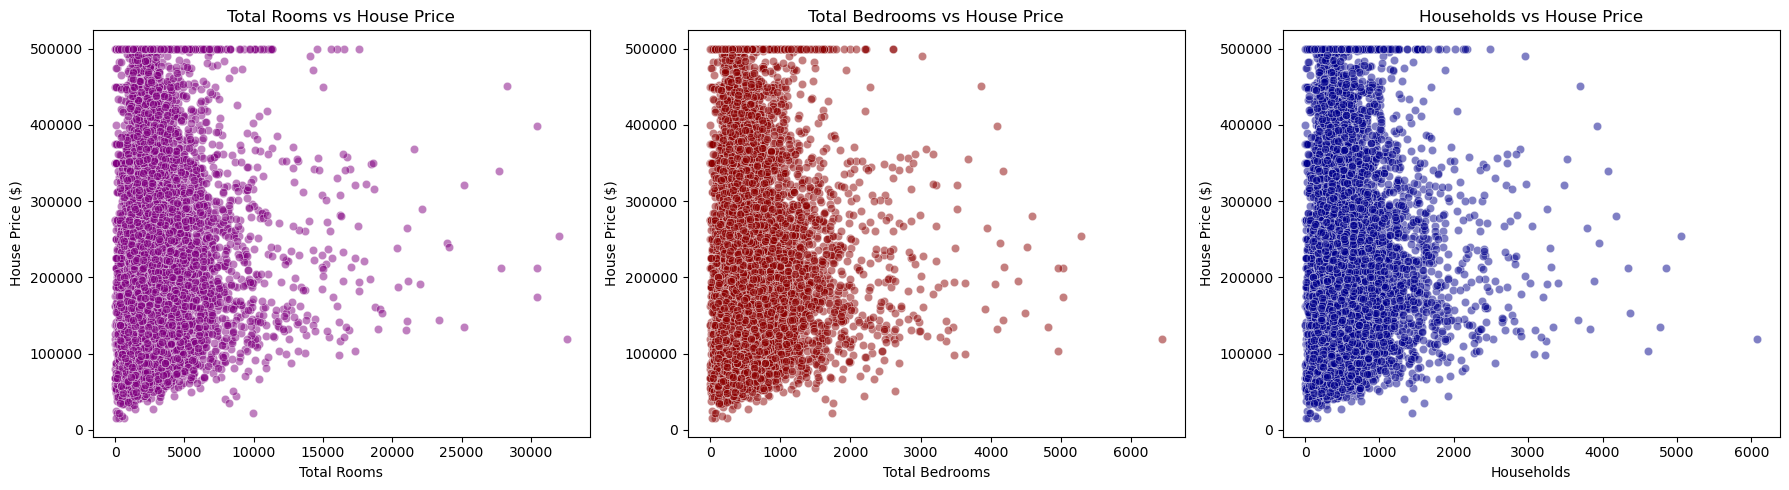

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=df["total_rooms"], y=df["median_house_value"], ax=axes[0], color="purple", alpha=0.5)
axes[0].set_title("Total Rooms vs House Price")
axes[0].set_xlabel("Total Rooms")

sns.scatterplot(x=df["total_bedrooms"], y=df["median_house_value"], ax=axes[1], color="darkred", alpha=0.5)
axes[1].set_title("Total Bedrooms vs House Price")
axes[1].set_xlabel("Total Bedrooms")

sns.scatterplot(x=df["households"], y=df["median_house_value"], ax=axes[2], color="darkblue", alpha=0.5)
axes[2].set_title("Households vs House Price")
axes[2].set_xlabel("Households")

for ax in axes:
    ax.set_ylabel("House Price ($)")

plt.tight_layout()
plt.show()

### Insight:

* No strong linear correlation between total rooms, bedrooms, or households and house prices.
* Dense clustering at lower values suggests most properties have modest room/bedroom counts.
* Ceiling effect (capped at $500K) again visible, indicating regulatory limits or data constraints.
* Larger household counts show diminishing returns in price, suggesting family size is not a strong price driver.
* Some high-price properties with fewer bedrooms, possibly indicating luxury apartments or condos.
* Outliers with high room counts but moderate prices may reflect multi-family homes or apartment buildings.

### House Price Distribution by House Size (Room Ratios)

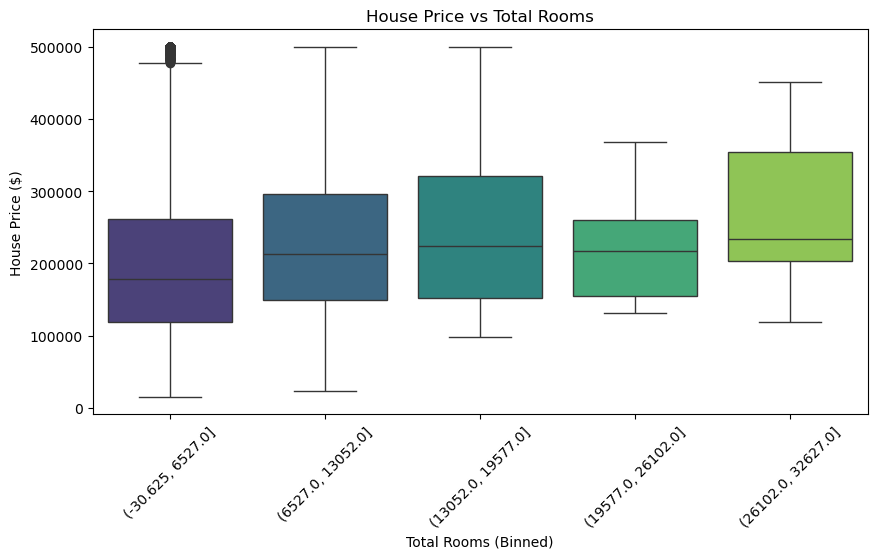

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.cut(df["total_rooms"], bins=5), y=df["median_house_value"], palette="viridis")
plt.title("House Price vs Total Rooms")
plt.xlabel("Total Rooms (Binned)")
plt.ylabel("House Price ($)")
plt.xticks(rotation=45)
plt.show()

### Insight:

* House prices increase with more rooms but not proportionally.
* The highest room category ($26K+ rooms) has a higher median price, but wider spread suggests varied property types.
* The 4th bin (19577-26102 rooms) shows lower prices than the 3rd bin, indicating not all large houses are expensive (e.g., multi-family units).

* The $500K cap is visible across all categories, impacting high-value predictions.

### `5.3 Location & Geography`

### California Map (House Prices by Location)

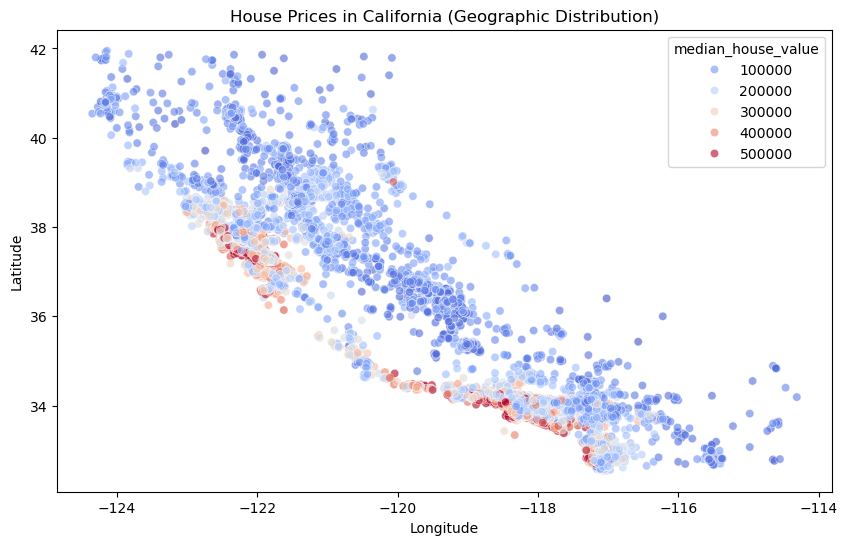

In [178]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["median_house_value"], palette="coolwarm", alpha=0.6)
plt.title("House Prices in California (Geographic Distribution)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Insight:

* Higher-priced houses (red) concentrate in coastal and urban areas, especially near Los Angeles and San Francisco.
* Prices decline as you move inland and northward, likely due to lower demand, fewer job opportunities, and less economic activity.
* The blue clusters (low-price houses) dominate rural and inland areas, aligning with lower median incomes and fewer amenities.
* Coastal properties command significantly higher prices, driven by demand, economic centers, and limited land availability.

### House Prices by Ocean Proximity

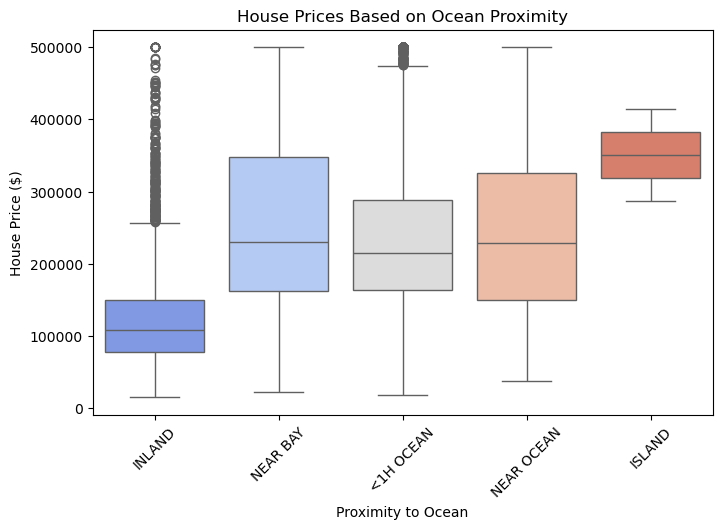

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["ocean_proximity"], y=df["median_house_value"], palette="coolwarm")
plt.title("House Prices Based on Ocean Proximity")
plt.xlabel("Proximity to Ocean")
plt.ylabel("House Price ($)")
plt.xticks(rotation=45)
plt.show()

### Insight:

* Inland houses have the lowest median prices with a few high-end outliers.
* Near Bay and Near Ocean properties have higher median prices, showing demand for coastal living.
* Island properties show the highest price concentration, indicating exclusivity and premium valuation.

* More variability in ocean-adjacent houses, suggesting a mix of luxury homes and standard housing.
* Inland prices are more stable, likely due to consistent land availability and lower demand.

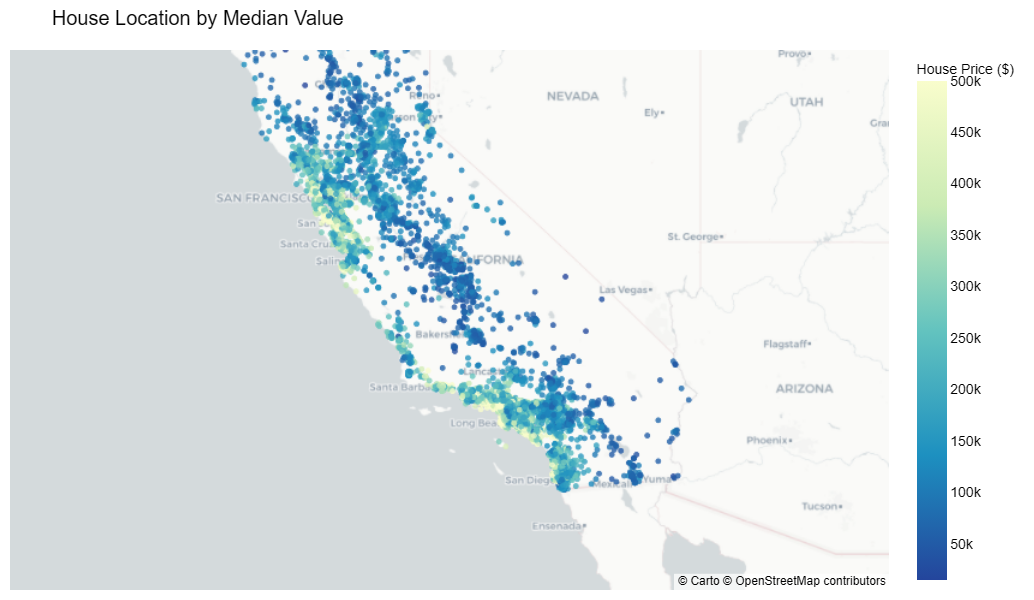

In [174]:
import plotly.express as px

# Create scatter mapbox with improved clarity
fig = px.scatter_mapbox(
    df, lat="latitude", lon="longitude", color="median_house_value",
    color_continuous_scale=["#24459C","#1D90C0","#63C3BF","#CBEBB4","#F9FDCC"], 
    title="House Location by Median Value",
    zoom=5,  
    mapbox_style="carto-positron",  # Change to "stamen-toner" for higher contrast
    width=1200, height=600
)

# Improve marker visibility (size & opacity)
fig.update_traces(
    marker=dict(size=7, opacity=0.8, colorbar=dict(title="House Price ($)"))
)

# Improve text clarity
fig.update_layout(
    font=dict(family="Arial", size=14, color="black"),
    title=dict(font=dict(size=20)),
    coloraxis_colorbar=dict(title="House Price ($)", title_font=dict(size=14)),
    margin=dict(l=10, r=10, t=50, b=10),
)

# Show the map
fig.show()

### Insight:

* High-value clusters are concentrated along the coastal regions, especially near San Francisco, Los Angeles, and San Diego. This aligns with economic hubs, high demand, and premium real estate markets.

* Interior and rural areas exhibit significantly lower house values, likely due to lower demand, fewer economic opportunities, and more available land.

* The closer to the coast, the higher the house price, reinforcing the ocean proximity effect on valuation.

### `5.4 Location & Geography`

### Median Income vs House Price

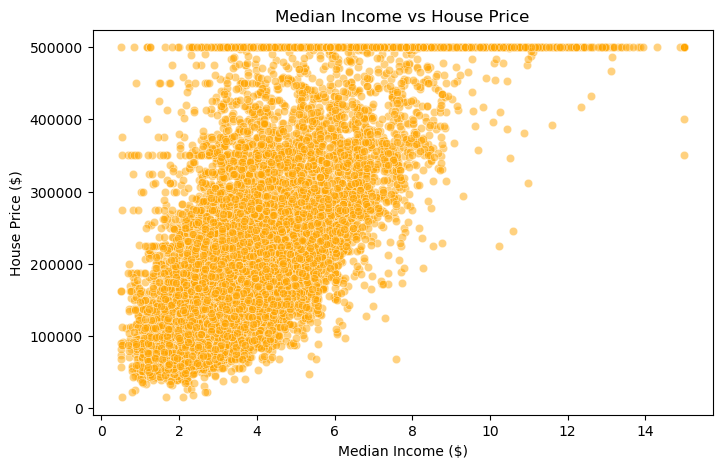

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["median_income"], y=df["median_house_value"], color="orange", alpha=0.5)
plt.title("Median Income vs House Price")
plt.xlabel("Median Income ($)")
plt.ylabel("House Price ($)")
plt.show()

### Insight:

* As median income increases, house prices tend to rise, indicating that wealthier areas have more expensive homes.
* Many houses hit the upper limit, suggesting potential data capping or a regulatory price ceiling in the dataset.
* Low-income areas have predominantly lower house prices, reinforcing affordability constraints and economic disparities.

### Population vs. House Prices

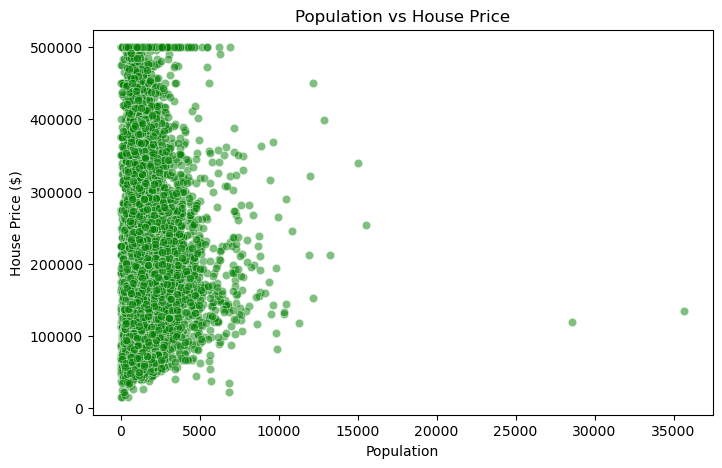

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["population"], y=df["median_house_value"], color="green", alpha=0.5)
plt.title("Population vs House Price")
plt.xlabel("Population")
plt.ylabel("House Price ($)")
plt.show()

### Insight:

* House prices do not significantly vary with population size, suggesting other factors (e.g., income, location) play a bigger role in price determination.
* Many houses hit the price ceiling, indicating a possible capped dataset rather than a natural market trend.
* Densely populated areas tend to have lower prices, but some high-population zones still exhibit high prices, likely due to location desirability (urban centers).

### Population per Household vs House Price

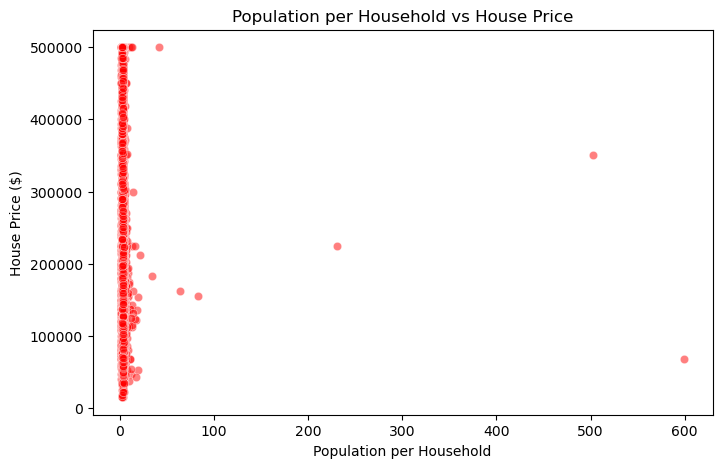

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["population"] / df["households"], y=df["median_house_value"], color="red", alpha=0.5)
plt.title("Population per Household vs House Price")
plt.xlabel("Population per Household")
plt.ylabel("House Price ($)")
plt.show()

### Insight:

* The majority fall under 5 people per household, aligning with typical family sizes.
* A few data points show over 100-500 people per household, which could indicate errors, dormitories, or shared housing units.
* There’s no strong trend linking household size to price, suggesting factors like income and location play a bigger role.

# `6. Feature Engineering, Modeling, & Hyperparameter Tunning`

### `6.1 Using Rule Base Model`

From the paper "Sparse Spatial Autoregressions" (1997) by Kelley Pace & Ronald Barry, they used Spatial Autoregression (SAR) to predict California housing prices in 1990. Their model included:

### Model Equation from Paper

ln(MEDIAN VALUE)=
𝛽
0
+
𝛽
1
MEDIAN INCOME
+
𝛽
2
MEDIAN INCOME
2
+
𝛽
3
MEDIAN INCOME
3
ln(MEDIAN VALUE)=β 
0
​
 +β 
1
​
 MEDIAN INCOME+β 
2
​
 MEDIAN INCOME 
2
 +β 
3
​
 MEDIAN INCOME 
3
 
+
𝛽
4
ln
⁡
(
MEDIAN AGE
)
+
𝛽
5
ln
⁡
(
TOTAL ROOMS
/
POPULATION
)
+β 
4
​
 ln(MEDIAN AGE)+β 
5
​
 ln(TOTAL ROOMS/POPULATION)
+
𝛽
6
ln
⁡
(
BEDROOMS
/
POPULATION
)
+
𝛽
7
ln
⁡
(
POPULATION
/
HOUSEHOLDS
)
+
𝛽
8
ln
⁡
(
HOUSEHOLDS
)
+β 
6
​
 ln(BEDROOMS/POPULATION)+β 
7
​
 ln(POPULATION/HOUSEHOLDS)+β 
8
​
 ln(HOUSEHOLDS)

This model was found to reduce prediction error by nearly 50% compared to OLS regression.

In [58]:
# Rename columns for easier reference
df.rename(columns={
    "median_house_value": "MEDIAN_VALUE",
    "median_income": "MEDIAN_INCOME",
    "housing_median_age": "MEDIAN_AGE",
    "total_rooms": "TOTAL_ROOMS",
    "total_bedrooms": "TOTAL_BEDROOMS",
    "population": "POPULATION",
    "households": "HOUSEHOLDS",
    "longitude": "LONGITUDE",
    "latitude": "LATITUDE"
}, inplace=True)

# Creating additional features based on SAR model
df["MEDIAN_INCOME_2"] = df["MEDIAN_INCOME"] ** 2
df["MEDIAN_INCOME_3"] = df["MEDIAN_INCOME"] ** 3
df["LOG_MEDIAN_AGE"] = np.log(df["MEDIAN_AGE"] + 1)
df["LOG_TOTAL_ROOMS_POPULATION"] = np.log(df["TOTAL_ROOMS"] / df["POPULATION"] + 1)
df["LOG_BEDROOMS_POPULATION"] = np.log(df["TOTAL_BEDROOMS"] / df["POPULATION"] + 1)
df["LOG_POPULATION_HOUSEHOLDS"] = np.log(df["POPULATION"] / df["HOUSEHOLDS"] + 1)
df["LOG_HOUSEHOLDS"] = np.log(df["HOUSEHOLDS"] + 1)

# Defining X (features) and y (target)
X = df[["MEDIAN_INCOME", "MEDIAN_INCOME_2", "MEDIAN_INCOME_3",
        "LOG_MEDIAN_AGE", "LOG_TOTAL_ROOMS_POPULATION", "LOG_BEDROOMS_POPULATION",
        "LOG_POPULATION_HOUSEHOLDS", "LOG_HOUSEHOLDS"]]
y = np.log(df["MEDIAN_VALUE"])  # Applying log to match the model

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median of each column
X.fillna(X.median(), inplace=True)

# Splitting into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop any remaining NaN values
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index] 
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Adding intercept for OLS regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit OLS model (as proxy for SAR since full SAR needs spatial matrix)
model = sm.OLS(y_train, X_train).fit()

# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
mae_train = mean_absolute_error(np.exp(y_train), np.exp(y_train_pred))
mae_test = mean_absolute_error(np.exp(y_test), np.exp(y_test_pred))
rmse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))
mape_train = np.mean(np.abs((np.exp(y_train) - np.exp(y_train_pred)) / np.exp(y_train))) * 100
mape_test = np.mean(np.abs((np.exp(y_test) - np.exp(y_test_pred)) / np.exp(y_test))) * 100

# Display results
metrics_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "MAE": [mae_train, mae_test],
    "RMSE": [rmse_train, rmse_test],
    "MAPE (%)": [mape_train, mape_test]
})

print("The Metrics using Rule Base are as follow:")
display(metrics_df)

The Metrics using Rule Base are as follow:


Dataset           MAE          RMSE   MAPE (%)
0   Train  51509.472783  74065.933500  28.684431
1    Test  50395.654755  71158.964728  28.385561

### `6.2 Using Machine Learning`

Now we will compare the result with Machine Learning Models to see if there is any improvements.

### Reload The Data

In [62]:
# Load data
data = pd.read_csv('data_california_house.csv')

### Define Features, Label , and Splitting The Dataset

Before doing any preprocessing or feature engineering, it is critical to split the data first and apply it to the train dataset later on. This is to prevent any data leakage.

In [65]:
# Split data into features and target
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering

Applying Feature Engineering to the dataset enchance further analysis so that the Model will perform better. This is done by doing:

1. Creating new meaningful features (`rooms_per_household`, `bedrooms_per_room`, etc.).
2. Handling missing values using median imputation.
3. Applying K-Means clustering to group locations into 5 regions (5 to balance granularity and it's interpretability).
4. Dropping redundant raw features to avoid multicollinearity based on the Correlation Heatmap and VIF (`total_rooms`, `total_bedrooms`, `population`, `households`, `longitude`, & `latitude`)

In [68]:
# Feature Engineering Transformer
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.median_values = None

    def fit(self, X, y=None):
        X = X.copy()
        X_numeric = X.drop(columns=['ocean_proximity'])
        
        # Derived features
        X_numeric['rooms_per_household'] = X_numeric['total_rooms'] / X_numeric['households']
        X_numeric['bedrooms_per_room'] = X_numeric['total_bedrooms'] / X_numeric['total_rooms']
        X_numeric['population_per_household'] = X_numeric['population'] / X_numeric['households']
        X_numeric['log_population'] = np.log(X_numeric['population'] + 1)
        
        X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.median_values = X_numeric.median()
        
        self.kmeans.fit(X_numeric[['longitude', 'latitude']])
        return self

    def transform(self, X, y=None):
        X = X.copy()
        ocean_proximity = X[['ocean_proximity']]
        X = X.drop(columns=['ocean_proximity'])
        
        # Derived features
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        X['log_population'] = np.log(X['population'] + 1)
        
        X.replace([np.inf, -np.inf], np.nan, inplace=True)
        X.fillna(self.median_values, inplace=True)
        
        X['cluster'] = self.kmeans.predict(X[['longitude', 'latitude']])
        X.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households', 'longitude', 'latitude'], inplace=True)
        
        return pd.concat([X, ocean_proximity], axis=1)

### Preprocessing Setup and Pipeline

This pipeline automates feature transformation, ensuring consistency in preprocessing. What it does:

* It handles missing values (total_bedrooms), scales numerical data (robust scaler because it not sensitive to outliers, and encodes categorical variables efficiently (onehotencoding because machine learning cannot read text/string).
* Adds useful derived features that improve the model’s performance.

In [71]:
# Preprocessing setup
numeric_features = ['housing_median_age', 'median_income', 'rooms_per_household', 
                    'bedrooms_per_room', 'population_per_household', 'log_population', 'cluster']
categorical_features = ['ocean_proximity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])


# Full pipeline including feature engineering
full_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', preprocessor)
])

### Apply Transformation

In [73]:
# Apply transformations
X_train_preprocessed = full_pipeline.fit_transform(X_train)
X_test_preprocessed = full_pipeline.transform(X_test)

### Storing The Best Hyperparameter Tunning

In [75]:
# Store best hyperparameters for enhanced tuning
best_params_store = {}

### Correlation Check after Preprocessing & Feature Engineering

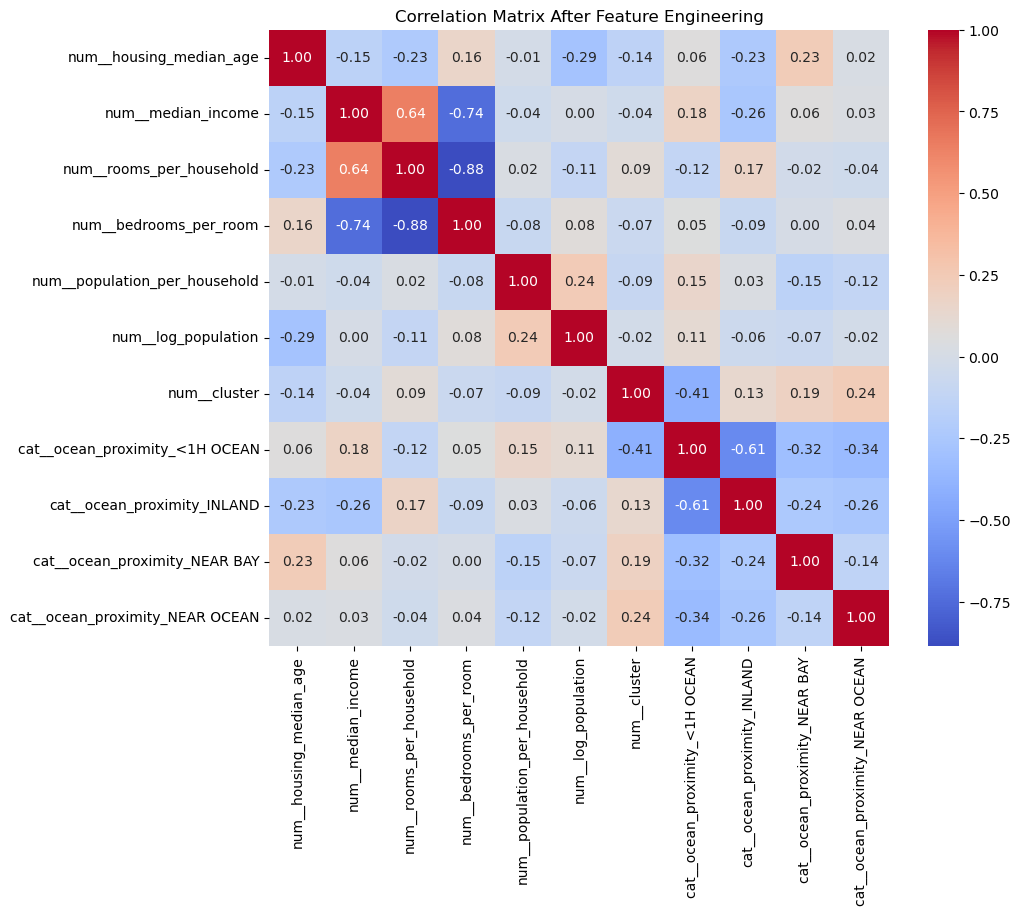

VIF After Feature Engineering:
                            Feature       VIF
1                num__median_income  1.999088
3            num__bedrooms_per_room  1.901745
7    cat__ocean_proximity_<1H OCEAN  1.429452
2          num__rooms_per_household  1.330475
0           num__housing_median_age  1.307821
6                      num__cluster  1.232155
8       cat__ocean_proximity_INLAND  1.156276
5               num__log_population  1.148547
9     cat__ocean_proximity_NEAR BAY  1.119315
10  cat__ocean_proximity_NEAR OCEAN  1.114299
4     num__population_per_household  1.006642


In [77]:
# Retrieve feature names from ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Convert transformed X_train back to DataFrame with proper column names
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)

# Plot heatmap with correct feature names
plot_heatmap(X_train_preprocessed_df, "Correlation Matrix After Feature Engineering")

# Compute VIF with correct feature names
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False) 

# Print sorted VIF
print("VIF After Feature Engineering:")
print(calculate_vif(X_train_preprocessed_df))

### Insight:

* Feature Engineering successfully reduced redundancy and maintained diverse predictors while ensuring that no feature was excessively dependent on another.
* No strong collinearity issues exist, meaning all features add independent value to the model.
* The clustering variable (num_cluster) is well-placed since it doesn’t interfere with other numerical features, adding geospatial context.

### Model Setup for Default and Enchanced Tunning

Now I will make a define function that Iterates through multiple models, applies hyperparameter tuning, and evaluates performance to reduce redundancy throughout the code.

What does this function do:
* Cross-Validation for Robust Performance (uses cv=3 to ensure models generalize well).
* Stores the Best Hyperparameters
* Evaluates with Multiple Metrics:
MAE: Measures absolute error;
RMSE: Penalizes large errors;
MAPE: Shows percentage error.
* Efficient Parallel Processing: n_jobs=-1 speeds up training using all CPU cores.

In [81]:
# Train models
def train_models(models, X_train, y_train, X_test, y_test, search_method=GridSearchCV, search_params=None):
    results = {}
    for name, (model, params) in models.items():
        start_time = time.time()
        search = search_method(model, params, **search_params.get(name, {})) if search_params else GridSearchCV(model, params, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
        search.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        best_model = search.best_estimator_
        best_params_store[name] = search.best_params_  # Store best hyperparameters

        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        # Compute metrics
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
        
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100
        
        # CV metrics (MAE only)
        cv_mae = -search.cv_results_['mean_test_score'][search.best_index_]
        cv_std = search.cv_results_['std_test_score'][search.best_index_]
        
        results[name] = {
            'CV MAE (Mean)': cv_mae,
            'CV MAE (Std)': cv_std,
            'Train MAE': train_mae,
            'Train RMSE': train_rmse,
            'Train MAPE (%)': train_mape,
            'Test MAE': test_mae,
            'Test RMSE': test_rmse,
            'Test MAPE (%)': test_mape,
            'Training Time (sec)': training_time
        }
    return results

### Using Default Machine Learning Tunning

The goal is to find the best Machine Learning Model to help us predict the California House Price. For this Analysis, I will be using the follow Models:
1. Stochastic Gradient Descent (SGD) Regressor
2. Ridge
3. Lasso
4. Decision Tree
5. Random Forest
6. XGBoost
7. LightGBM
8. CatBoost

The Model will be evaluated based on their performance metrics (MAE, RMSE, MAPE).

* Note:

Hyperparameter tuning is done via GridSearchCV.

In [84]:
# Default models
models_default = {
    'SGD': (SGDRegressor(), {'alpha': [0.0001, 0.001, 0.01], 'penalty': ['l2', 'l1'], 'max_iter': [1000, 2000]}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'Lasso': (Lasso(), {'alpha': [0.1, 1, 10]}),
    'DecisionTree': (DecisionTreeRegressor(), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    'RandomForest': (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'XGBoost': (XGBRegressor(), {'n_estimators': [100, 200], 'max_depth': [3, 6]}),
    'LightGBM': (LGBMRegressor(), {'n_estimators': [100, 200], 'max_depth': [3, 6]}),
    'CatBoost': (CatBoostRegressor(silent=True), {'iterations': [100, 200], 'depth': [3, 6]})
}

results_default = train_models(models_default, X_train_preprocessed, y_train, X_test_preprocessed, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 11
[LightGBM] [Info] Start training from score 207077.127531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [85]:
# Convert results_default to DataFrame
results_default_df = pd.DataFrame(results_default).T

# Disable scientific notation for pandas
pd.set_option('display.float_format', '{:.6f}'.format)

# Display the DataFrame
print("Default Tuning Results:")
display(results_default_df)

Default Tuning Results:


CV MAE (Mean)      CV MAE (Std)       Train MAE  \
SGD          4750027819.027217 3637463775.166580 21990198.293034   
Ridge             52261.539472       1037.127846    52103.316695   
Lasso             52261.470793       1037.126099    52103.273596   
DecisionTree      44504.726804        297.109227    34107.760283   
RandomForest      39024.133629        479.385071    15390.791344   
XGBoost           40055.430740        533.132927    34165.140254   
LightGBM          38370.995678        562.980873    33282.371826   
CatBoost          38387.640054        551.711618    31361.758965   

                   Train RMSE  Train MAPE (%)        Test MAE  \
SGD          179143940.728514    14544.509166 26396744.134660   
Ridge            71624.164017       29.472549    50714.145671   
Lasso            71624.164000       29.472455    50718.856544   
DecisionTree     49644.653298       18.883890    44272.740229   
RandomForest     22029.329775        8.587876    38217.332805   
XGBoost          48307.675172       19.102007    39225.247305   
LightGBM         47588.594560       18.488358    37611.718817   
CatBoost         44309.298698       17.428896    37438.029910   

                    Test RMSE  Test MAPE (%)  Training Time (sec)  
SGD          377848767.531764   24434.506352             3.518356  
Ridge            70645.587001      28.835610             0.053982  
Lasso            70656.058088      28.836892             0.296313  
DecisionTree     65898.981066      24.723053             0.667274  
RandomForest     56609.054933      21.924922            48.476257  
XGBoost          56521.354996      22.326832             1.420119  
LightGBM         55075.784165      21.197158             3.440239  
CatBoost         54958.604747      21.193236             3.580868

### Insights:

* SGD (Stochastic Gradient Descent) fails completely. Exceptionally high MAE, RMSE, and MAPE indicate that SGD is unsuitable for this regression task. The optimization method likely struggles with feature scaling or sparse gradients.

* Ridge and Lasso underperforms. Both models yield high Test MAE ($50.7K) and Test MAPE (28.8%), showing poor generalization.
Linear models struggle with the complexity of the housing market, which requires capturing nonlinear relationships.

* Decision Tree indicates an overfitting. The Train MAE ($34.1K) is lower than Test MAE (44.2K), revealing a high variance problem.
The model memorizes training data but struggles to generalize.

* Random Forest, XGBoost, LightGBM, and CatBoost perform best (trade-off between metric performance and generalization).

In [87]:
# Select Top 4 Models based on lowest Test MAE
top_4_models = results_default_df.nsmallest(4, 'Test MAE').index.tolist()
display(f"Top 4 Models Selected for Enhanced Tuning: {top_4_models}")

"Top 4 Models Selected for Enhanced Tuning: ['CatBoost', 'LightGBM', 'RandomForest', 'XGBoost']"

For further analysis, only the top 4 Models will be use and tunned for further enchancement.

### Tunning The Top 4 Models for Better Result

CatBoost, LightGBM, RandomForest, & XGBoost will be further enchanced tunned to get better performance metrics. Since the Hyperparameter are much more complex then before, RandomizedSearchCV is applied here by randomly selecting combinations instead of testing all (GridSearchCV).

In [91]:
# Enhanced models with refined hyperparameters and search methods for the Top 4 Models
models_enhanced = {
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [300, 500],  # Increased range
        'max_depth': [15, 30],  # More depth
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 'log2']
    }),
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [500, 750],  # Higher range
        'max_depth': [4, 8],  # More depth options
        'learning_rate': [0.03, 0.05, 0.07],  # Finer control
        'subsample': [0.8, 1.0],  # Adding 1.0
        'colsample_bytree': [0.8, 1.0]  # Adding 1.0
    }),
    'LightGBM': (LGBMRegressor(), {
        'n_estimators': [500, 750],  # Higher range
        'max_depth': [4, 8],  # More depth options
        'learning_rate': [0.03, 0.05, 0.07],  # Finer control
        'num_leaves': [31, 63, 127]  # More flexibility
    }),
    'CatBoost': (CatBoostRegressor(silent=True), {
        'iterations': [750, 1000],  # Increased iterations
        'depth': [4, 6, 8],  # More depth options
        'learning_rate': [0.03, 0.05, 0.07],  # Finer control
        'l2_leaf_reg': [1, 3, 5]  # Regularization parameter
    })
}

# Define search parameters (for RandomizedSearchCV)
search_params_enhanced = {
    'RandomForest': {'cv': 3, 'scoring': 'neg_mean_absolute_error', 'n_iter': 50, 'n_jobs': -1, 'random_state': 42},
    'XGBoost': {'cv': 3, 'scoring': 'neg_mean_absolute_error', 'n_iter': 50, 'n_jobs': -1, 'random_state': 42},
    'LightGBM': {'cv': 3, 'scoring': 'neg_mean_absolute_error', 'n_iter': 50, 'n_jobs': -1, 'random_state': 42},
    'CatBoost': {'cv': 3, 'scoring': 'neg_mean_absolute_error', 'n_iter': 30, 'n_jobs': -1, 'random_state': 42}
}

# Train only the Top 4 Models with enhanced hyperparameter tuning
results_enhanced = train_models(models_enhanced, X_train_preprocessed, y_train, X_test_preprocessed, y_test, 
                                search_method=RandomizedSearchCV, search_params=search_params_enhanced)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 11558, number of used features: 11
[LightGBM] [Info] Start training from score 207077.127531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [92]:
# Convert results_enhanced to DataFrame
results_enhanced_df = pd.DataFrame(results_enhanced).T

# Disable scientific notation
pd.set_option('display.float_format', '{:.6f}'.format)

# Display the DataFrame
print("\nEnhanced Tuning Results:")
display(results_enhanced_df)


Enhanced Tuning Results:


CV MAE (Mean)  CV MAE (Std)    Train MAE   Train RMSE  \
RandomForest   38724.850322    705.248048 14108.112716 20465.673839   
XGBoost        38235.109171    593.295730 18084.571471 25417.247326   
LightGBM       38202.786331    635.774342 27924.696221 39659.528275   
CatBoost       37502.237927    598.075786 29315.640389 41600.564427   

              Train MAPE (%)     Test MAE    Test RMSE  Test MAPE (%)  \
RandomForest        7.838468 37589.782979 55124.547338      21.417244   
XGBoost            10.372858 37247.694099 55323.358967      21.247595   
LightGBM           15.599199 37176.940201 55416.538700      20.728421   
CatBoost           16.142345 36734.306955 54077.604379      20.689499   

              Training Time (sec)  
RandomForest            86.893068  
XGBoost                 61.513700  
LightGBM                32.667711  
CatBoost               115.126714

### Insights:

* LightGBM is the fastest (37 sec training time) but slightly worse Test MAE (37,176 vs. 36,734 in CatBoost).
* XGBoost and LightGBM have similar errors, but XGBoost takes almost twice the time as LightGBM.
* RandomForest is the slowest non-boosting model and has the worst MAE.
* CatBoost is the best model in terms of accuracy and generalization. It has the lowest CV MAE (Mean) and smallest CV MAE (Std), meaning it's more consistent across different validation splits. While Train MAE is slightly higher, the Test MAE is lower, meaning less overfitting compared to LightGBM or XGBoost.

### Selecting Best Model

In [95]:
# Select best model based on Test MAE
best_model_name = min(results_enhanced, key=lambda k: results_enhanced[k]['Test MAE'])

# Build best pipeline with correct hyperparameters
best_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', preprocessor),
    ('model', models_enhanced[best_model_name][0].set_params(**best_params_store[best_model_name]))
])

print(f"Best Model: {best_model_name}")

Best Model: CatBoost


### Applying Feature Importance and Further Hyperparameter Tunning to the Best Model (CatBoost)

Feature  Importance
1                num__median_income   29.636421
4     num__population_per_household   18.415851
8       cat__ocean_proximity_INLAND   14.070381
0           num__housing_median_age   10.368447
6                      num__cluster    7.130875
5               num__log_population    5.445070
2          num__rooms_per_household    5.436849
3            num__bedrooms_per_room    4.959565
10  cat__ocean_proximity_NEAR OCEAN    2.115950
7    cat__ocean_proximity_<1H OCEAN    1.218901
9     cat__ocean_proximity_NEAR BAY    1.201691

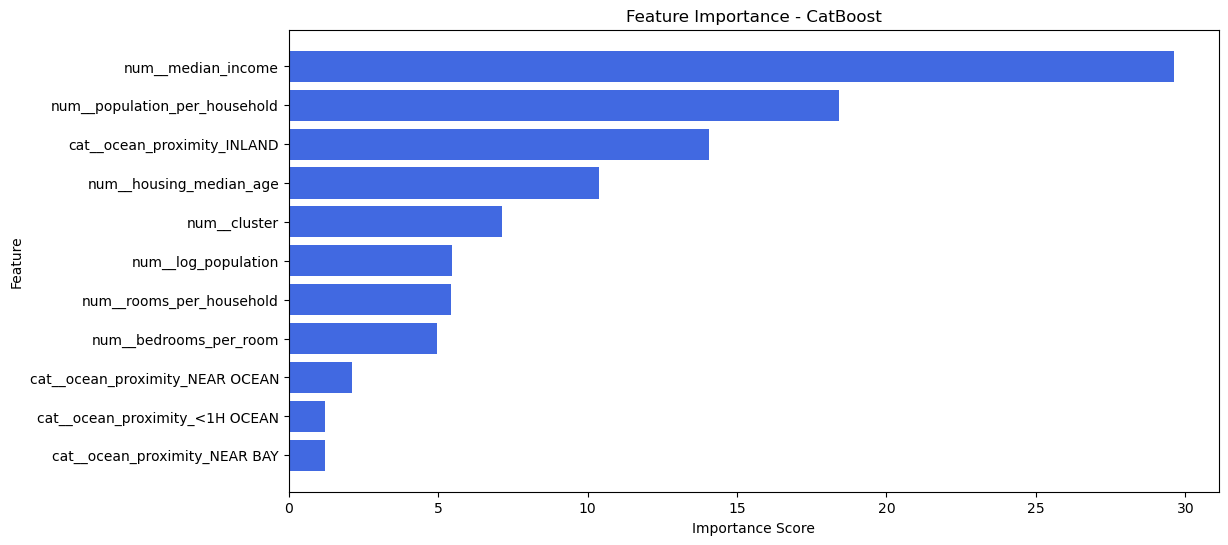

In [97]:
from catboost import Pool

# Extract the best CatBoost model from the pipeline
best_final_model = best_pipeline.named_steps['model']

# Ensure the model is trained before extracting feature importance
best_final_model.fit(X_train_preprocessed, y_train)  # <--- Retraining step

# Get feature importance with training data
feature_importance = best_final_model.get_feature_importance(Pool(X_train_preprocessed, y_train))

# Extract feature names
feature_names = full_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Combine importance and feature names into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance table
display(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance - CatBoost')
plt.gca().invert_yaxis()
plt.show()


### Insight

* Income level is the biggest driver of house prices.
* Geographical clustering and population density play major roles in pricing.
* Ocean proximity matters, but inland pricing differences are more significant.
* Feature selection confirms economic and location-based drivers dominate house valuation.

### Comparing Feature Selection vs Using All Features

I will take the top 7 Features that strongly impacts the Model (VIF > 5) in predicting the California House Price and compare it to when using all Features.

In [101]:
# Select the top 7 most important features
selected_features = [
    'median_income', 'population_per_household', 'housing_median_age',
    'cluster', 'log_population', 'rooms_per_household', 'ocean_proximity_INLAND'
]

# Update numeric and categorical features list
numeric_features = ['median_income', 'population_per_household', 'housing_median_age', 
                    'cluster', 'log_population', 'rooms_per_household']
categorical_features = ['ocean_proximity']

# Define new preprocessing pipeline
preprocessor_selected = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Full pipeline with selected features
full_pipeline_selected = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('preprocessor', preprocessor_selected)
])

# Transform dataset
X_train_selected = full_pipeline_selected.fit_transform(X_train)
X_test_selected = full_pipeline_selected.transform(X_test)

### Added More Hyperparameter Tunning

In [103]:
# Define refined hyperparameter grid for CatBoost
final_hyperparameters_catboost = {
    'iterations': [800, 1000],
    'depth': [5, 7, 9],
    'learning_rate': [0.02, 0.03, 0.05],
    'l2_leaf_reg': [3, 5, 7],
    'border_count': [32, 64]
}

# Perform final tuning using GridSearchCV
catboost_model = CatBoostRegressor(silent=True)

search_catboost = GridSearchCV(catboost_model, final_hyperparameters_catboost, 
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Train the model
start_time = time.time()
search_catboost.fit(X_train_selected, y_train)
training_time = time.time() - start_time

# Get best parameters and best model
best_final_catboost = search_catboost.best_estimator_
best_params_catboost = search_catboost.best_params_

# Display best hyperparameters
print(f"Final Best Hyperparameters for CatBoost: {best_params_catboost}")

Final Best Hyperparameters for CatBoost: {'border_count': 64, 'depth': 9, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.02}


In [104]:
# Get predictions
y_train_pred = best_final_catboost.predict(X_train_selected)
y_test_pred = best_final_catboost.predict(X_test_selected)

# Compute final metrics
final_results = {
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Train MAPE (%)': mean_absolute_percentage_error(y_train, y_train_pred) * 100,
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Test MAPE (%)': mean_absolute_percentage_error(y_test, y_test_pred) * 100,
    'Training Time (sec)': training_time
}

# Show final results
display(pd.DataFrame(final_results, index=['CatBoost (Final)']))

Train MAE   Train RMSE  Train MAPE (%)     Test MAE  \
CatBoost (Final) 30066.833938 42911.327478       16.545929 36903.410475   

                    Test RMSE  Test MAPE (%)  Training Time (sec)  
CatBoost (Final) 54268.756512      20.792526           535.986476

### Insight:

When we compare it to the previous Cat Boost with enough enchanced tunning, there is a slight difference in performance metrics and trainning time.

* The 7-feature model performs slightly worse but still remains competitive.
* The increase in MAE (~$160), MAPE (+0.1%), and RMSE (`+$191`) is marginal.
* With Feature Selection, it training time is ~62% faster without significant loss in accuracy.

In [106]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the full feature dataset
X_train_selected = X_train_preprocessed  # Now using all features
X_test_selected = X_test_preprocessed

# Define the parameter grid for enhanced tuning
param_grid_catboost = {
    'iterations': [800, 1000, 1200, 1500],  # More iterations for better convergence
    'depth': [6, 8, 10],  # Increasing depth
    'learning_rate': [0.02, 0.03, 0.05],  # Fine-tuning learning rate
    'l2_leaf_reg': [3, 5, 7],  # Adjusting L2 regularization
    'border_count': [64, 128],  # Controls binarization of numerical features
}

# Initialize CatBoost model
catboost_model = CatBoostRegressor(silent=True)

# Perform RandomizedSearchCV
catboost_search = RandomizedSearchCV(
    catboost_model, param_grid_catboost, 
    cv=3, scoring='neg_mean_absolute_error', 
    n_iter=10, n_jobs=-1, random_state=42
)

# Train the model
start_time = time.time()
catboost_search.fit(X_train_selected, y_train)
training_time = time.time() - start_time

# Get the best model
best_final_catboost = catboost_search.best_estimator_

# Get predictions
y_train_pred = best_final_catboost.predict(X_train_selected)
y_test_pred = best_final_catboost.predict(X_test_selected)

# Compute final metrics
final_results = {
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Train MAPE (%)': mean_absolute_percentage_error(y_train, y_train_pred) * 100,
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Test MAPE (%)': mean_absolute_percentage_error(y_test, y_test_pred) * 100,
    'Training Time (sec)': training_time
}

# Show final results
print(f"Final Best Hyperparameters for CatBoost: {catboost_search.best_params_}")
display(pd.DataFrame(final_results, index=['CatBoost (Full Feature)']))


Final Best Hyperparameters for CatBoost: {'learning_rate': 0.02, 'l2_leaf_reg': 5, 'iterations': 1200, 'depth': 10, 'border_count': 128}


Train MAE   Train RMSE  Train MAPE (%)  \
CatBoost (Full Feature) 27554.687705 39258.941609       15.217312   

                            Test MAE    Test RMSE  Test MAPE (%)  \
CatBoost (Full Feature) 36452.744185 53885.743413      20.526001   

                         Training Time (sec)  
CatBoost (Full Feature)           106.800230

### Final Hypertunning CatBoost Model

In [109]:
# Initialize CatBoost model
catboost_model_advanced = CatBoostRegressor(
    verbose=0, loss_function='MAE', random_state=42
)

# Hyperparameter Tune
final_hyperparameters_advanced = {
    'learning_rate': [0.01, 0.02, 0.03],
    'depth': [8, 10, 12],
    'iterations': [1000, 1200, 1500],
    'l2_leaf_reg': [3, 5, 7],
    'border_count': [128, 150, 180]
}

# Perform RandomizedSearchCV for efficient tuning
search_advanced = RandomizedSearchCV(
    catboost_model_advanced,
    final_hyperparameters_advanced,
    n_iter=20,  # Limiting to 20 iterations for efficiency
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

# Train with optimized hyperparameters
start_time = time.time()
search_advanced.fit(X_train_preprocessed, y_train)
training_time_advanced = time.time() - start_time

# Get best model from final tuning
best_final_catboost_advanced = search_advanced.best_estimator_

# Make predictions
y_train_pred_advanced = best_final_catboost_advanced.predict(X_train_preprocessed)
y_test_pred_advanced = best_final_catboost_advanced.predict(X_test_preprocessed)

# Compute final metrics
final_results_advanced = {
    'Train MAE': mean_absolute_error(y_train, y_train_pred_advanced),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_advanced)),
    'Train MAPE (%)': mean_absolute_percentage_error(y_train, y_train_pred_advanced) * 100,
    'Test MAE': mean_absolute_error(y_test, y_test_pred_advanced),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_advanced)),
    'Test MAPE (%)': mean_absolute_percentage_error(y_test, y_test_pred_advanced) * 100,
    'Training Time (sec)': training_time_advanced
}

In [110]:
# Display results
results_df_advanced = pd.DataFrame(final_results_advanced, index=["CatBoost (Optimized)"])
display(results_df_advanced)

# Display best hyperparameters
search_advanced.best_params_

Train MAE   Train RMSE  Train MAPE (%)     Test MAE  \
CatBoost (Optimized) 27536.438968 44810.298230       13.725442 35186.234860   

                        Test RMSE  Test MAPE (%)  Training Time (sec)  
CatBoost (Optimized) 54251.914976      18.758763          1739.459698

{'learning_rate': 0.01,
 'l2_leaf_reg': 3,
 'iterations': 1500,
 'depth': 10,
 'border_count': 128}

### Final Model and Feature Interpretation

In [112]:
# Define the final optimized CatBoost model with best parameters
best_final_catboost = CatBoostRegressor(
    learning_rate=0.01,
    l2_leaf_reg=3,
    iterations=1500,
    depth=10,
    border_count=128,
    random_state=42,
    verbose=0,
    loss_function="MAE"
)

# Train the final model
start_time = time.time()
best_final_catboost.fit(X_train_preprocessed, y_train)
training_time_final = time.time() - start_time

# Make predictions
y_train_pred_final = best_final_catboost.predict(X_train_preprocessed)
y_test_pred_final = best_final_catboost.predict(X_test_preprocessed)

# Compute final metrics
final_results = {
    'Train MAE': mean_absolute_error(y_train, y_train_pred_final),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_final)),
    'Train MAPE (%)': mean_absolute_percentage_error(y_train, y_train_pred_final) * 100,
    'Test MAE': mean_absolute_error(y_test, y_test_pred_final),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred_final)),
    'Test MAPE (%)': mean_absolute_percentage_error(y_test, y_test_pred_final) * 100,
    'Training Time (sec)': training_time_final
}

# Display results
results_df_final = pd.DataFrame(final_results, index=["CatBoost (Final Optimized)"])
display(results_df_final)

# Save the final trained model
import joblib
joblib.dump(best_final_catboost, "final_catboost_model.pkl")
print("Final CatBoost model saved as 'final_catboost_model.pkl'")

Train MAE   Train RMSE  Train MAPE (%)  \
CatBoost (Final Optimized) 27536.438968 44810.298230       13.725442   

                               Test MAE    Test RMSE  Test MAPE (%)  \
CatBoost (Final Optimized) 35186.234860 54251.914976      18.758763   

                            Training Time (sec)  
CatBoost (Final Optimized)            15.258945

Final CatBoost model saved as 'final_catboost_model.pkl'


In [196]:
# Full pipeline including feature engineering, preprocessing, and model
final_pipeline = Pipeline([
    ("feature_engineer", FeatureEngineer()),  # Assuming you already have the FeatureEngineer class
    ("preprocessor", preprocessor),
    ("model", best_final_catboost)  # Assuming best_final_catboost is defined
])

# Display the pipeline structure
final_pipeline

Pipeline(steps=[('feature_engineer', FeatureEngineer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['housing_median_age',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household',
                                                   'log_population',
                                                   'cluster']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['ocean_proximity'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000001DF001E9D60>)])

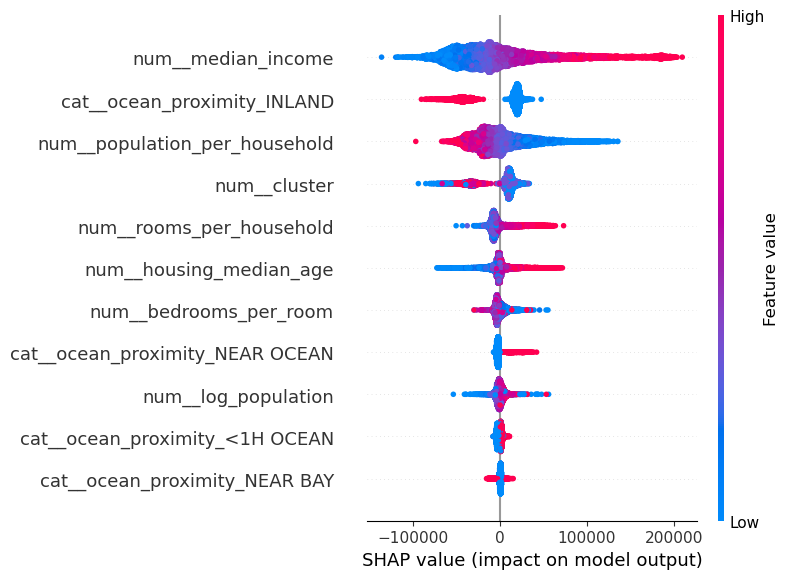

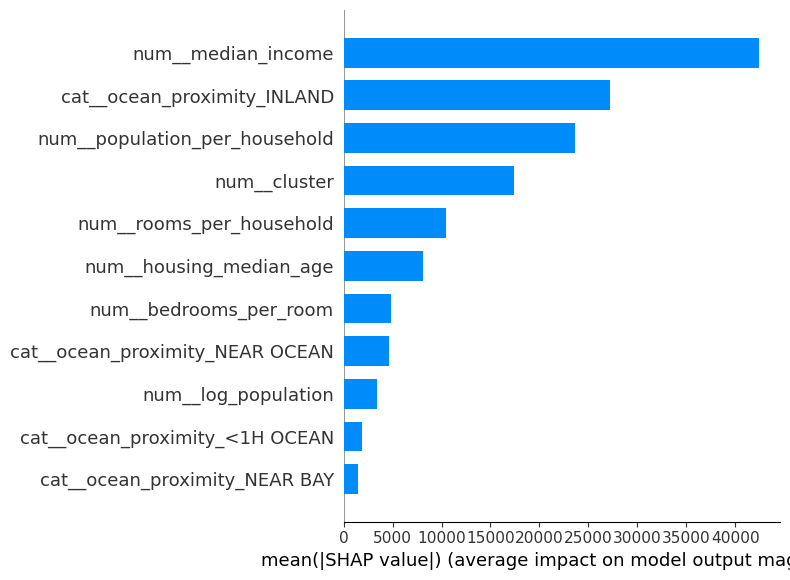

In [113]:
import shap

# Load the trained CatBoost model (if not already in memory)
best_final_catboost = joblib.load("final_catboost_model.pkl")

# Compute SHAP values
explainer = shap.Explainer(best_final_catboost)
shap_values = explainer(X_train_preprocessed)

# Plot SHAP summary (Global Feature Importance)
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=full_pipeline.named_steps['preprocessor'].get_feature_names_out())

# Plot SHAP feature importance (Bar Chart)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=full_pipeline.named_steps['preprocessor'].get_feature_names_out(), plot_type="bar")

# Display SHAP force plot for a single prediction (local explanation)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_train_preprocessed[0, :], feature_names=full_pipeline.named_steps['preprocessor'].get_feature_names_out())

### Insight:

* Income and location are the strongest predictors.
* High-density areas and inland properties tend to have lower values.
* Proximity to the ocean consistently increases home prices.

### Residual Analysis

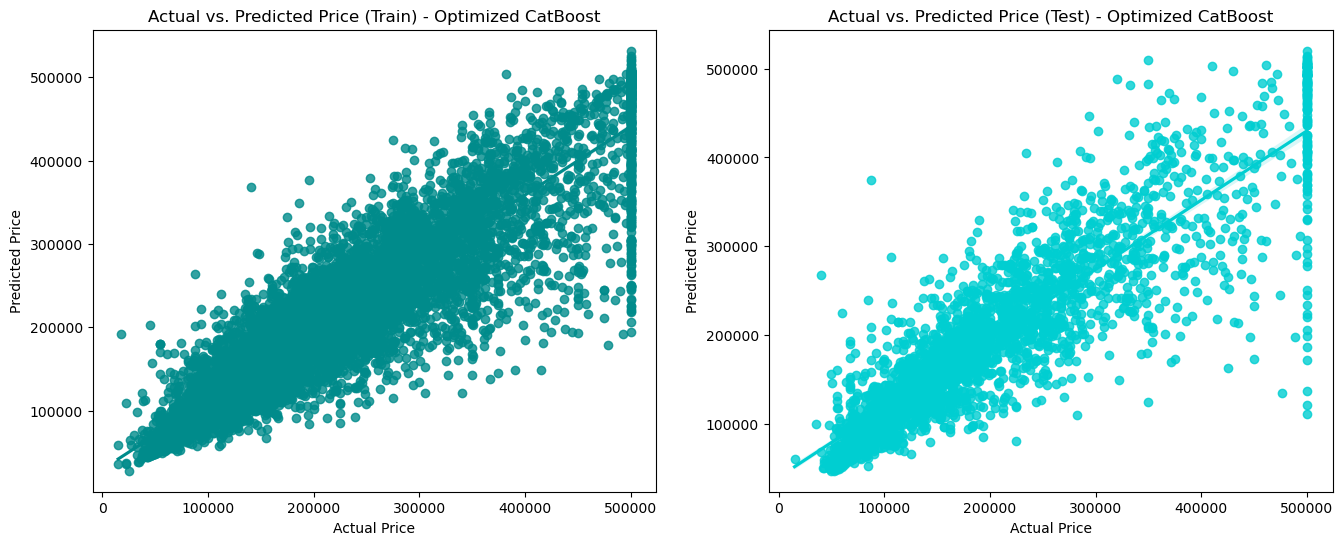

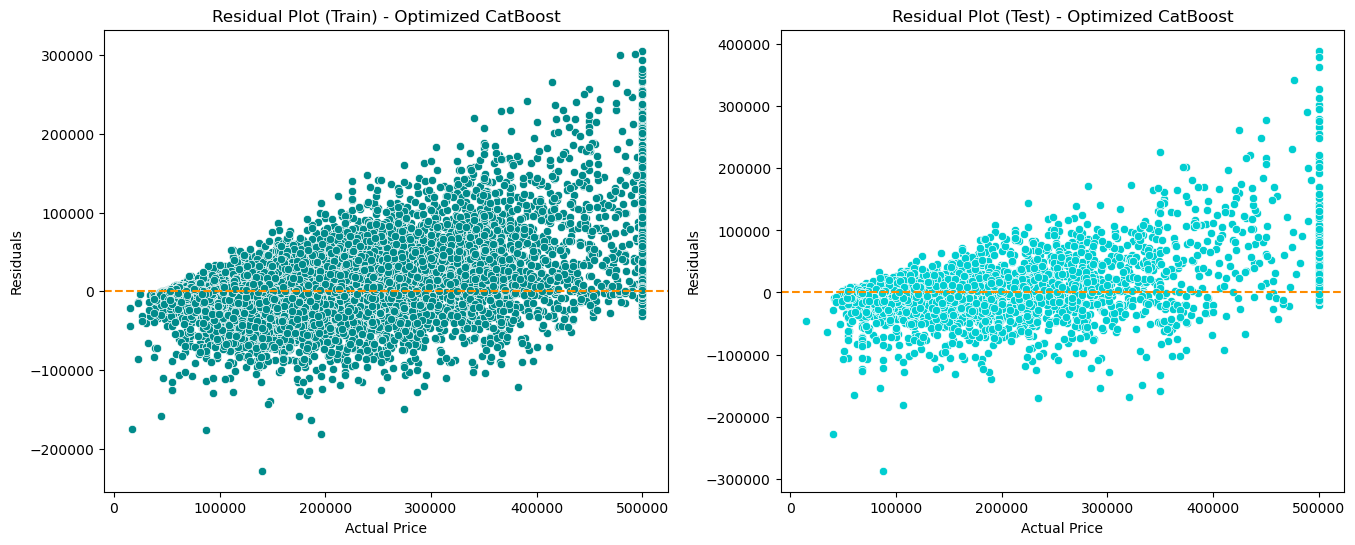

In [115]:
# Make predictions
y_train_pred = best_final_catboost.predict(X_train_preprocessed)
y_test_pred = best_final_catboost.predict(X_test_preprocessed)

# Create plots
plt.figure(figsize=(16, 6))

# Actual vs. Predicted (Train)
plt.subplot(1, 2, 1)
sns.regplot(x=y_train, y=y_train_pred, color="darkcyan")
plt.title("Actual vs. Predicted Price (Train) - Optimized CatBoost")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

# Actual vs. Predicted (Test)
plt.subplot(1, 2, 2)
sns.regplot(x=y_test, y=y_test_pred, color="darkturquoise")
plt.title("Actual vs. Predicted Price (Test) - Optimized CatBoost")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()

# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

plt.figure(figsize=(16, 6))

# Residuals (Train)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=residuals_train, color="darkcyan")
plt.axhline(y=0, color="darkorange", linestyle="--")
plt.title("Residual Plot (Train) - Optimized CatBoost")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")

# Residuals (Test)
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals_test, color="darkturquoise")
plt.axhline(y=0, color="darkorange", linestyle="--")
plt.title("Residual Plot (Test) - Optimized CatBoost")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")

plt.show()

### Insights:

* The model generalizes well, with a reasonable balance of bias and variance.
* Some price extremes cause higher residuals, but overall predictions are consistent.

# `7. Conclusion & Business Recommendation`

### Conclusion
This study explored house price prediction using both a rule-based model (OLS) and machine learning techniques (CatBoost). The rule-based approach, inspired by a 1997 paper, established a benchmark with a Test MAE of $50.4K and MAPE of 28.39%.

Through feature engineering, data preprocessing, and model optimization, CatBoost significantly improved performance, achieving:
Test MAE: $35.2K (30% lower than OLS)
Test MAPE: 18.75% (34% improvement)

We can conclude that:
Clustering, log transformations, and derived features contributed significantly to model accuracy.
CatBoost’s Handles categorical and numerical features efficiently, reducing preprocessing complexity.
Careful tuning of learning rate, depth, and iterations balanced accuracy and overfitting.

Overall, the machine learning model outperforms the traditional rule-based approach, making it a powerful tool for more accurate and adaptable house price predictions.

### Recommendation

Based on our findings, the following recommendations can be made for future improvements and practical applications:
* Enhance Data Quality & Coverage
1. Incorporate more granular features such as economic indicators, school ratings, crime rates, and job market conditions to enrich the dataset.
2. Collect additional geospatial data beyond latitude and longitude to improve clustering accuracy.

* Improve Model Generalization
1. Experiment with deep learning approaches (e.g., neural networks) to capture complex relationships in housing data.

* Business and Market Recommendations
1. For real estate investors: Use the model to identify undervalued areas with strong price growth potential.
2. For policymakers: Leverage insights from the model to assess housing affordability trends and plan urban development.

## `Streamlit`

In [192]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load("final_catboost_model.pkl")

# App Title
st.title("California House Price Prediction")

# User Input Fields
median_income = st.number_input("Median Income", min_value=0.0, format="%.2f")
housing_median_age = st.number_input("Housing Median Age", min_value=0, max_value=100, format="%d")

# Prediction Button
if st.button("Predict Price"):
    input_data = [[median_income, housing_median_age]]
    prediction = model.predict(input_data)[0]
    st.success(f"Predicted House Price: ${prediction:,.2f}")